In [ ]:
# DATA EXTRACTION
# YAML file STOCK DATA to CSV conversion

In [4]:
import os
import yaml
import pandas as pd


BASE_PATH = r"C:\Users\priya\OneDrive\Desktop\data"   
OUTPUT_FILE = "all_stocks.csv"       


all_records = []

for root, dirs, files in os.walk(BASE_PATH):
    for file in files:
        if file.endswith((".yaml", ".yml")):
            filepath = os.path.join(root, file)
            with open(filepath, "r") as f:
                try:
                    content = yaml.safe_load(f)
                except Exception as e:
                    print(f"Error parsing {filepath}: {e}")
                    continue

            if isinstance(content, list):
                # Each item in list is a record
                for item in content:
                    all_records.append(item)
            else:
                print(f"Unexpected YAML format in {filepath}, skipping.")

# Convert to DataFrame
df = pd.DataFrame(all_records)
# Save CSV
df.to_csv(OUTPUT_FILE, index=False)

print("All YAML files merged successfully into:", OUTPUT_FILE)


All YAML files merged successfully into: all_stocks.csv


In [ ]:
# SECTOR CSV mapped WITH STOCK CSV 

In [45]:
import pandas as pd

# Load CSVs
stocks_df = pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\Guvi coding\all_stocks.csv")
sector_df = pd.read_csv(r"C:/Users/priya/OneDrive/Desktop/data/Sector_data.csv")

# Clean column names
stocks_df.columns = stocks_df.columns.str.strip()
sector_df.columns = sector_df.columns.str.strip()

# Extract ticker from Symbol in sector_df
sector_df['Ticker_from_Symbol'] = sector_df['Symbol'].apply(lambda x: x.split(":")[-1].strip())

# Initialize a sector column in stocks_df
stocks_df['sector'] = None

# Function to find sector based on ticker/company partial match
def get_sector(ticker):
    # Check exact match in Ticker_from_Symbol
    match = sector_df[sector_df['Ticker_from_Symbol'].str.contains(ticker, case=False, na=False)]
    if not match.empty:
        return match.iloc[0]['sector']
    # Check partial match in COMPANY
    match = sector_df[sector_df['COMPANY'].str.contains(ticker, case=False, na=False)]
    if not match.empty:
        return match.iloc[0]['sector']
    return None

# Apply function to all tickers in stocks_df
stocks_df['sector'] = stocks_df['Ticker'].apply(get_sector)

# Save the final CSV
stocks_df.to_csv(r"C:\Users\priya\OneDrive\Desktop\Guvi coding\all_stocks_with_sector.csv", index=False)

print("Merged CSV with sectors added (using partial matching) is created successfully!")


Merged CSV with sectors added (using partial matching) is created successfully!


In [ ]:
# DATA CLEANING

In [2]:
import pandas as pd
# Load the merged CSV
df = pd.read_csv("all_stocks_with_sector.csv")

In [4]:
print("Shape of data (rows, columns):", df.shape)
print("\nFirst 5 rows:\n", df.head())

Shape of data (rows, columns): (14200, 9)

First 5 rows:
        Ticker    close                 date    high      low    month    open  \
0        SBIN   602.95  2023-10-03 05:30:00   604.9   589.60  2023-10   596.6   
1  BAJFINANCE  7967.60  2023-10-03 05:30:00  7975.5  7755.00  2023-10  7780.8   
2       TITAN  3196.25  2023-10-03 05:30:00  3212.5  3114.40  2023-10  3148.8   
3         ITC   439.75  2023-10-03 05:30:00   442.9   439.25  2023-10   441.0   
4         TCS  3513.85  2023-10-03 05:30:00  3534.2  3480.10  2023-10  3534.2   

     volume          sector  
0  15322196         BANKING  
1    944555         FINANCE  
2   1007308       RETAILING  
3   7481883  FOOD & TOBACCO  
4   1948148        SOFTWARE  


In [5]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 Ticker      0
close       0
date        0
high        0
low         0
month       0
open        0
volume      0
sector    852
dtype: int64


In [7]:
# Dropping the rows which have NaN in the 'sector' column
df = df.dropna(subset=['sector'])

In [8]:
#Check duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [9]:
print("Data Types BEFORE cleaning:\n", df.dtypes, "\n")

Data Types BEFORE cleaning:
 Ticker     object
close     float64
date       object
high      float64
low       float64
month      object
open      float64
volume      int64
sector     object
dtype: object 



In [11]:
# Convert data types
df['Ticker'] = df['Ticker'].astype(str)
df['close'] = df['close'].astype(float)
df['high'] = df['high'].astype(float)
df['low'] = df['low'].astype(float)
df['open'] = df['open'].astype(float)
df['volume'] = df['volume'].astype(int)
df['sector'] = df['sector'].astype(str)

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [16]:
print("Data Types AFTER cleaning:\n", df.dtypes, "\n")

Data Types AFTER cleaning:
 Ticker            object
close            float64
date      datetime64[ns]
high             float64
low              float64
month             object
open             float64
volume             int32
sector            object
dtype: object 



In [17]:
# After all cleaning steps
df.to_csv("cleaned_stocks.csv", index=False)
print("Cleaned data saved to cleaned_stocks.csv")

Cleaned data saved to cleaned_stocks.csv


In [ ]:
# DATA ANALYSIS 

In [90]:
import pandas as pd
import numpy as np

# Load your cleaned data (replace with your file path)
df = pd.read_csv("cleaned_stocks.csv", parse_dates=["date"])

# Ensure data is sorted properly
df = df.sort_values(["Ticker", "date"]).reset_index(drop=True)

# Quick check
print(df.dtypes)
print(df.head())


Ticker            object
close            float64
date      datetime64[ns]
high             float64
low              float64
month             object
open             float64
volume             int64
sector            object
dtype: object
       Ticker    close                date     high      low    month  \
0  ADANIPORTS 831.4000 2023-10-03 05:30:00 836.7500 824.2500  2023-10   
1  ADANIPORTS 824.6000 2023-10-04 05:30:00 845.4500 819.3500  2023-10   
2  ADANIPORTS 825.2000 2023-10-05 05:30:00 832.0000 820.2500  2023-10   
3  ADANIPORTS 830.7500 2023-10-06 05:30:00 836.5000 826.4000  2023-10   
4  ADANIPORTS 790.0500 2023-10-09 05:30:00 818.8000 785.0000  2023-10   

      open   volume         sector  
0 826.0000  2453090  MISCELLANEOUS  
1 830.9500  4096647  MISCELLANEOUS  
2 830.8500  2083505  MISCELLANEOUS  
3 830.0000  1877058  MISCELLANEOUS  
4 815.0000  5994282  MISCELLANEOUS  


In [ ]:
#Key Metrics

In [91]:
import pandas as pd

# Function to calculate overall yearly return across dataset
def yearly_return_all(df):
    data = df.copy()
    
    result = data.groupby('Ticker').agg(
        start_close=('close', 'first'),
        end_close=('close', 'last'),
        avg_price=('close', 'mean'),
        avg_volume=('volume', 'mean')
    ).reset_index()
    
    # Yearly return calculation
    result['yearly_return'] = (result['end_close'] / result['start_close'] - 1) * 100
    return result.sort_values('yearly_return', ascending=False)
# Run calculation
yearly_returns = yearly_return_all(df)

# Top 10 Gainer Stocks (best returns)
top10_green = yearly_returns.head(10)

# Top 10 Loss Stocks (worst returns)
top10_loss = yearly_returns.sort_values('yearly_return', ascending=True).head(10)
# Market Summary
market_summary = {
    "Green Stocks Count": (yearly_returns['yearly_return'] > 0).sum(),
    "Red Stocks Count": (yearly_returns['yearly_return'] <= 0).sum(),
    "Average Price (all stocks)": yearly_returns['avg_price'].mean(),
    "Average Volume (all stocks)": yearly_returns['avg_volume'].mean()
}

# Display results
print("Top 10 Green Stocks:\n", top10_green[['Ticker', 'yearly_return']])
print("\nTop 10 Loss Stocks:\n", top10_loss[['Ticker', 'yearly_return']])
print("\nMarket Summary:\n", market_summary)



Top 10 Green Stocks:
         Ticker  yearly_return
44       TRENT       223.0926
7          BEL       101.7601
27         M&M        95.9770
4   BAJAJ-AUTO        89.0112
32   POWERGRID        68.8549
8         BPCL        67.4772
17  HEROMOTOCO        58.9767
37   SUNPHARMA        57.2824
14     HCLTECH        53.2574
30        NTPC        51.5133

Top 10 Loss Stocks:
         Ticker  yearly_return
21  INDUSINDBK       -30.4584
2   ASIANPAINT       -21.9350
6   BAJFINANCE       -16.1109
19  HINDUNILVR        -0.9579
29   NESTLEIND         0.7071
25   KOTAKBANK         1.9918
5   BAJAJFINSV         2.5496
43       TITAN         3.5182
28      MARUTI         6.9267
23         ITC         7.9363

Market Summary:
 {'Green Stocks Count': 43, 'Red Stocks Count': 4, 'Average Price (all stocks)': 2403.694897362901, 'Average Volume (all stocks)': 7080856.539181899}


In [ ]:
# Volatility Analysis

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# 1Calculate daily returns
df = df.sort_values(['Ticker', 'date']).reset_index(drop=True)  # Ensure sorted by Ticker and date
df['daily_return'] = df.groupby('Ticker')['close'].pct_change()

# Compute volatility (standard deviation of daily returns) per stock
volatility = df.groupby('Ticker')['daily_return'].std().reset_index()
volatility.rename(columns={'daily_return': 'volatility'}, inplace=True)

# Convert to percentage
volatility['volatility'] = volatility['volatility'] * 100

# Top 10 most volatile stocks
top10_volatility = volatility.sort_values('volatility', ascending=False).head(10)

print(" Top 10 Most Volatile Stocks")
print(top10_volatility)


 Top 10 Most Volatile Stocks
        Ticker  volatility
0   ADANIPORTS      2.6029
7          BEL      2.3283
44       TRENT      2.3074
31        ONGC      2.2247
8         BPCL      2.2069
36  SHRIRAMFIN      2.1687
10   COALINDIA      2.1411
18    HINDALCO      1.9587
30        NTPC      1.9475
27         M&M      1.9213


In [ ]:
#Cumulative Return Over Time

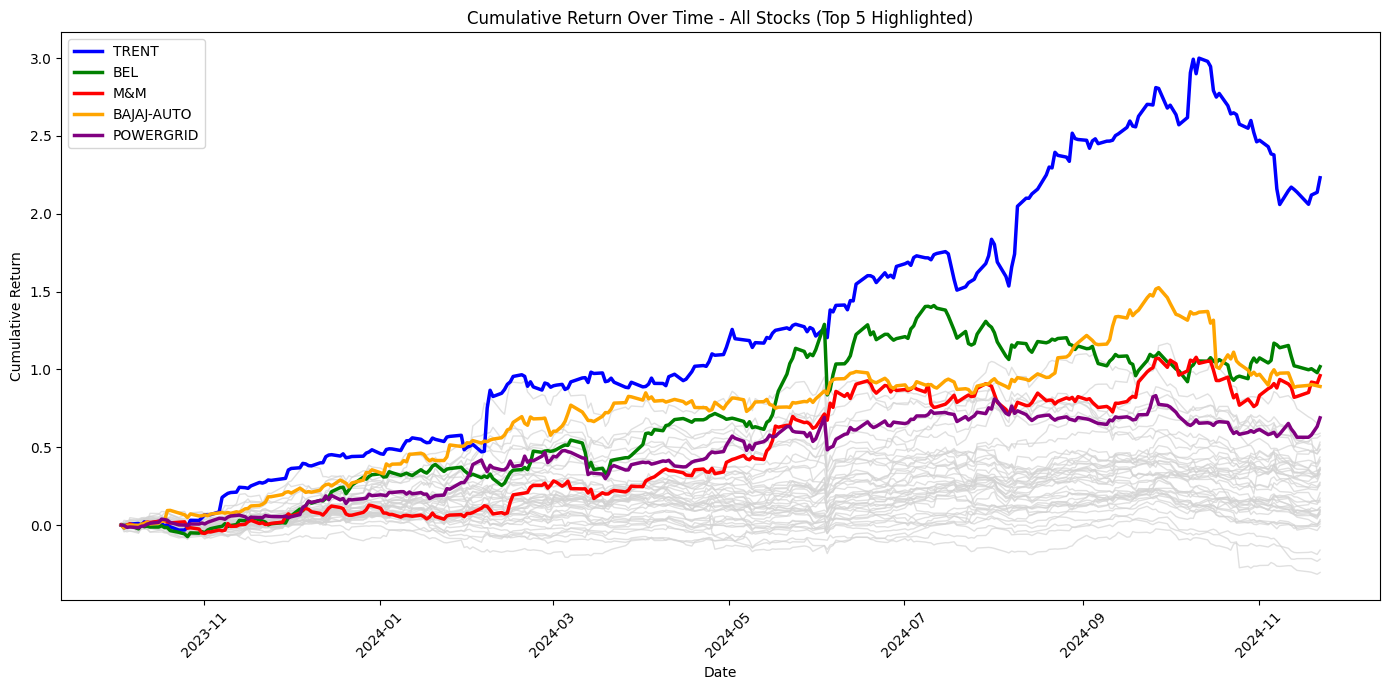

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure data is sorted by Ticker and Date
df = df.sort_values(['Ticker', 'date']).reset_index(drop=True)

# Calculate daily returns
df['daily_return'] = df.groupby('Ticker')['close'].pct_change()

# Calculate cumulative returns per stock
df['cumulative_return'] = df.groupby('Ticker')['daily_return'].transform(lambda x: (1 + x.fillna(0)).cumprod() - 1)

# Determine top 5 performing stocks based on last cumulative return
final_cum_return = df.groupby('Ticker')['cumulative_return'].last().reset_index()
top5_cum_stocks = final_cum_return.sort_values('cumulative_return', ascending=False).head(5)['Ticker'].tolist()

# Plot cumulative return for all stocks
plt.figure(figsize=(14,7))

# Plot all stocks in light grey
for ticker in df['Ticker'].unique():
    stock_data = df[df['Ticker']==ticker]
    plt.plot(stock_data['date'], stock_data['cumulative_return'], color='lightgrey', linewidth=1, alpha=0.7)

# Highlight top 5 performers
colors = ['blue','green','red','orange','purple']
for i, ticker in enumerate(top5_cum_stocks):
    stock_data = df[df['Ticker']==ticker]
    plt.plot(stock_data['date'], stock_data['cumulative_return'], label=ticker, linewidth=2.5, color=colors[i])

plt.title('Cumulative Return Over Time - All Stocks (Top 5 Highlighted)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [78]:
#Sector-wise Performance

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure yearly return is calculated for each stock (from previous analysis)
yearly_returns = df.groupby('Ticker').agg(
    start_close=('close', 'first'),
    end_close=('close', 'last'),
    sector=('sector', 'first')  # take sector from original data
).reset_index()

yearly_returns['yearly_return'] = (yearly_returns['end_close'] / yearly_returns['start_close'] - 1) * 100

# Calculate average yearly return per sector
sector_perf = yearly_returns.groupby('sector')['yearly_return'].mean().reset_index()
sector_perf = sector_perf.sort_values('yearly_return', ascending=False)

print("Average Yearly Return by Sector")
print(sector_perf)



Average Yearly Return by Sector
             sector  yearly_return
15        RETAILING       113.3054
4           DEFENCE       101.7601
14            POWER        60.1841
1       AUTOMOBILES        54.5265
10           MINING        41.8465
3            CEMENT        36.9709
5            ENERGY        36.5648
11    MISCELLANEOUS        36.1031
0         ALUMINIUM        35.8683
18         TEXTILES        35.7820
16         SOFTWARE        34.7722
13  PHARMACEUTICALS        31.3792
17            STEEL        19.2171
9         INSURANCE        11.7678
6           FINANCE        11.5761
2           BANKING        11.3805
7              FMCG         4.3980
8    FOOD & TOBACCO         4.3217
12           PAINTS       -21.9350


In [ ]:
#Stock Price Correlation

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])

# Pivot data: Dates as rows, tickers as columns
price_wide = df.pivot(index='date', columns='Ticker', values='close')

# Calculate daily returns for correlation
returns_wide = price_wide.pct_change().dropna()

# Correlation matrix of daily returns
corr_matrix = returns_wide.corr()

# Print correlation matrix
print("=== Stock Price Correlation Matrix ===")
print(corr_matrix)



=== Stock Price Correlation Matrix ===
Ticker      ADANIPORTS  APOLLOHOSP  ASIANPAINT  AXISBANK  BAJAJ-AUTO  \
Ticker                                                                 
ADANIPORTS      1.0000      0.1689      0.2740    0.3805      0.2045   
APOLLOHOSP      0.1689      1.0000      0.2581    0.1794      0.2239   
ASIANPAINT      0.2740      0.2581      1.0000    0.1261      0.1677   
AXISBANK        0.3805      0.1794      0.1261    1.0000      0.1985   
BAJAJ-AUTO      0.2045      0.2239      0.1677    0.1985      1.0000   
BAJAJFINSV      0.3980      0.2494      0.2481    0.3937      0.2377   
BAJFINANCE      0.3988      0.2231      0.2969    0.3541      0.1786   
BEL             0.5857      0.2246      0.1570    0.3305      0.2334   
BPCL            0.4951      0.1750      0.2158    0.2229      0.2155   
CIPLA           0.0911      0.2311      0.1470    0.0853      0.0435   
COALINDIA       0.5462      0.2435      0.1950    0.3326      0.2258   
DRREDDY         0.1610   

In [ ]:
#Top 5 Gainers and Losers (Month-wise)

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month in YYYY-MM format
df['month'] = df['date'].dt.to_period('M').astype(str)

# Calculate monthly returns per stock
monthly_returns = df.groupby(['Ticker', 'month']).agg(
    first_close=('close', 'first'),
    last_close=('close', 'last')
).reset_index()

monthly_returns['monthly_return'] = (monthly_returns['last_close'] / monthly_returns['first_close'] - 1) * 100

# Identify top 5 gainers and losers per month
monthly_top = {}
months = monthly_returns['month'].unique()

for m in months:
    month_data = monthly_returns[monthly_returns['month'] == m]
    top_gainers = month_data.sort_values('monthly_return', ascending=False).head(5)
    top_losers = month_data.sort_values('monthly_return', ascending=True).head(5)
    
    monthly_top[m] = {'Top Gainers': top_gainers, 'Top Losers': top_losers}




In [106]:
import pickle

# Create a dictionary to store all analysis results
analysis_data = {
    "df": df,  # <--- include original DataFrame
    "yearly_returns": yearly_returns,
    "top10_green": top10_green,
    "top10_loss": top10_loss,
    "market_summary": market_summary,
    "top10_volatility": top10_volatility,
    "top5_cum_stocks": top5_cum_stocks,
    "sector_perf": sector_perf,
    "corr_matrix": corr_matrix,
    "monthly_top": monthly_top
}

# Save the dictionary to a pickle file
with open('all_analysis.pkl', 'wb') as f:
    pickle.dump(analysis_data, f)

print("All analysis saved to all_analysis.pkl")

All analysis saved to all_analysis.pkl
